In [2]:
# default_exp utils.distances

In [2]:
# export

import numpy as np
from abc import ABC, abstractmethod
from typing import Tuple, List, Optional, Any
from ds4se.utils.statistics import estimate_bins_number

In [2]:
# export

#Logging configuration

import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='mylog.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.INFO)

## distances

> Generic interface for defining distance metrics for multiple purposes (clustering, sample sets comparison, etc).

> Functions for computing divergence metrics (e.g., KL div, Jensen Shannon divergence).

### Distances

In [8]:
# export


class CustomDistance(ABC):
    
    @abstractmethod
    def compute_distance(self, x: np.ndarray, y: np.ndarray) -> float:
        """
        Computes the distance (dissimilarity) metric among 2 real vectors
        """
        pass

Define custom distance (or dissimilarity) metrics

In [10]:
# export

class EuclideanDistance(CustomDistance):
    
    def compute_distance(self, x: np.ndarray, y: np.ndarray) -> float:
        return np.linalg.norm(x - y)

In [15]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

euc_dist = EuclideanDistance()
dist = euc_dist.compute_distance(a, b)

assert(dist == 5.196152422706632)

In [9]:
# export

class JaccardDistance(CustomDistance):
    def compute_distance(self, x: np.ndarray, y: np.ndarray) -> float:
        x_set = set(x)
        y_set = set(y)
    
        jacc_idx= len(x_set & y_set) / len(x_set | y_set)
        
        return jacc_idx

In [11]:
a = [0, 1, 2, 5, 6, 8, 9]
b = [0, 2, 3, 4, 5, 7, 9]

jacc_dist = JaccardDistance()

assert jacc_dist.compute_distance(a, b) == 0.4

### Divergences

In [ ]:
# export

def kl_divergence(p, q):
    '''
    Kullback-Leibler divergence calculates a score that measures the divergence of one probability distribution from another.
    '''
    return sum(p[i] * np.log2(p[i]/q[i]) for i in range(len(p)))

In [ ]:
# export

def js_divergence(p, q):
    #https://machinelearningmastery.com/divergence-between-probability-distributions/
    '''Jensen-Shannon Divergence that provides a normalized and symmetrical version of the KL divergence,
    Jensen-Shannon divergence extends KL divergence to calculate a symmetrical score and distance measure of one probability distribution from another.'''
    m = 0.5 * (p + q)
    jensen_divergence = 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)
    jensen_distance = np.sqrt(jensen_divergence)
    return jensen_divergence, jensen_distance

In [ ]:
# export

# TODO: Check bins estimation --> estimate for vector 1: hmn vector and 
# use the same estimation for vector 2

def statistical_distance(dataset1: np.ndarray, dataset2: np.ndarray,
                         bins: Optional[Any]=None) -> Tuple[float, float]:
    """Bining Bootstrapped Arrays
    
    :param dataset1: first vector to compare (shoould be human-data)
    :param dataset2: second vector to compare (should be generated-data)
    :param bins: Int or array indicating bins distribution for binning
                - If int: quantity of bins to used
                - If array: bin edges for bins
    Returns divergence and distance of given distributions
    """
    total_data = np.concatenate((dataset1, dataset2), axis=None)

    MIN = total_data.min()
    MAX = total_data.max()
    
    if bins is None:
        # bins = estimate_bins_number(total_data)
        _, bin_edges = np.histogram(total_data)
    
    # Compute frequency and bins
    control_frequency, control_bins = np.histogram(dataset1, bin_edges, range=[MIN, MAX])
    treat_frequency, treat_bins = np.histogram(dataset2, bin_edges, range=[MIN, MAX])
    
    #Solving empty bins
    treat_frequency =  np.array([ i / np.sum(treat_frequency) if i != 0 else 1.e-20 for i in treat_frequency])
    control_frequency =  np.array([ i / np.sum(control_frequency) if i != 0 else 1.e-20 for i in control_frequency])
    
    # Jensen Shannon (T || C) [Divergence & Distance]
    divergence, distance = js_divergence(p=control_frequency, q= treat_frequency)
    
    logging.info(f"Divergence: {round(divergence,2)}")
    logging.info(f"Distance: {round(distance,2)}")
    
    return divergence, distance

In [13]:
# For methodology demonstration

In [14]:
import pandas as pd

In [23]:
!ls /home/jovyan/work/notebooks/[interpretability]/uncondit_int_exp/results/metrics/tfr_layers6_vocab10000_embd768_heads12

5000-samples_1621479183.06776-hmn-metrics.csv
5000-samples_1621479183.11202-hmn-metrics.csv
5000-samples_1621479183.15598-hmn-metrics.csv
5000-samples_1621479183.197363-hmn-metrics.csv
5000-samples_1621479183.244737-hmn-metrics.csv
5000-samples_1621479183.290283-hmn-metrics.csv
5000-samples_1621479183.3353-hmn-metrics.csv
5000-samples_1621479183.37972-hmn-metrics.csv
5000-samples_1621479183.424547-hmn-metrics.csv
5000-samples_1621479183.469185-hmn-metrics.csv
5000-samples_1621479183.513359-hmn-metrics.csv
5000-samples_1621479183.557104-hmn-metrics.csv
5000-samples_1621479183.602216-hmn-metrics.csv
5000-samples_1621479183.646485-hmn-metrics.csv
5000-samples_1621479183.689498-hmn-metrics.csv
5000-samples_1621479183.733399-hmn-metrics.csv
5000-samples_1621479183.776237-hmn-metrics.csv
5000-samples_1621479183.824336-hmn-metrics.csv
5000-samples_1621479183.868053-hmn-metrics.csv
5000-samples_1621479183.912805-hmn-metrics.csv
5000-samples_1621479183.957276-hmn-metrics.csv
5000-samples_162147

In [26]:
hmn_mtcs = pd.read_csv('/home/jovyan/work/notebooks/[interpretability]/uncondit_int_exp/results/metrics/tfr_layers6_vocab10000_embd768_heads12/5000-samples_1621479183.11202-hmn-metrics.csv')

In [28]:
gen_mtcs = pd.read_csv('/home/jovyan/work/notebooks/[interpretability]/uncondit_int_exp/results/metrics/tfr_layers6_vocab10000_embd768_heads12/5000-samples_1631218179.551035-gen-metrics.csv')

In [29]:
gen_mtcs.columns

Index(['Unnamed: 0', 'file', 'class', 'wmc', 'totalMethodsQty',
       'staticMethodsQty', 'publicMethodsQty', 'privateMethodsQty',
       'protectedMethodsQty', 'defaultMethodsQty', 'abstractMethodsQty',
       'finalMethodsQty', 'synchronizedMethodsQty', 'totalFieldsQty',
       'staticFieldsQty', 'publicFieldsQty', 'privateFieldsQty',
       'protectedFieldsQty', 'defaultFieldsQty', 'visibleFieldsQty',
       'finalFieldsQty', 'synchronizedFieldsQty', 'nosi', 'loc', 'returnQty',
       'loopQty', 'comparisonsQty', 'tryCatchQty', 'parenthesizedExpsQty',
       'stringLiteralsQty', 'numbersQty', 'assignmentsQty',
       'mathOperationsQty', 'variablesQty', 'maxNestedBlocksQty',
       'anonymousClassesQty', 'innerClassesQty', 'lambdasQty',
       'uniqueWordsQty', 'modifiers'],
      dtype='object')

In [46]:
gen_mtcs.groupby(['file']).ngroups

5001

In [30]:
gen_dim_parenth = gen_mtcs['parenthesizedExpsQty'].values

In [31]:
hmn_dim_parenth = hmn_mtcs['parenthesizedExpsQty'].values

In [50]:
gen_dim_compars = gen_mtcs['comparisonsQty']
hmn_dim_compars = hmn_mtcs['comparisonsQty']

In [121]:
a = gen_dim_compars[10:20].values

In [122]:
a

array([4, 0, 0, 0, 3, 0, 0, 1, 1, 3])

In [120]:
b = hmn_dim_compars[10:20].values

In [123]:
b

array([0, 1, 1, 0, 0, 2, 0, 0, 0, 1])

In [124]:
total_dims_data = np.concatenate((a, b), axis=None)

In [125]:
total_dims_data

array([4, 0, 0, 0, 3, 0, 0, 1, 1, 3, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1])

In [126]:
MIN_ = total_dims_data.min()
MAX_ = total_dims_data.max()

_, bin_edges_ = np.histogram(total_dims_data)
    
freq_a, bins_a = np.histogram(a, bin_edges_, range=[MIN_, MAX_])
freq_b, bins_b = np.histogram(b, bin_edges_, range=[MIN_, MAX_])

In [127]:
bin_edges_

array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ])

In [128]:
bins_a = 0.5 * (bins_a[:-1] + bins_a[1:])
bins_b = 0.5 * (bins_b[:-1] + bins_b[1:])

In [83]:
bins_a

array([0.2, 0.6, 1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8])

In [85]:
freq_a

array([12,  0,  5,  0,  0,  0,  0,  2,  0,  1])

In [103]:
import matplotlib.pyplot as plt

In [97]:
len(bins_a)

10

In [98]:
len(freq_a)

10

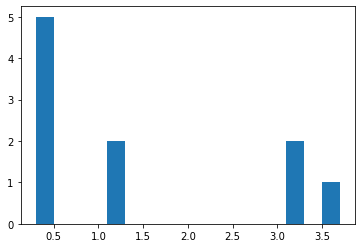

In [129]:
plt.hist(bins_a, bins_a, weights=freq_a, rwidth=0.5)
plt.show()

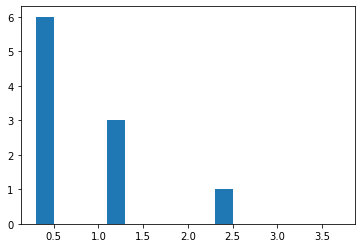

In [130]:
plt.hist(bins_b, bins_b, weights=freq_b, rwidth=0.5)
plt.show()

In [69]:
bins = 0.5 * (bins[:-1] + bins[1:])

In [47]:
gtzero_gen = gen_dim_parenth > 0

In [49]:
gen_dim_parenth[gtzero_gen]

array([ 1,  1,  4,  3,  1,  1,  2,  1,  1,  1,  2,  1,  2,  1,  1,  1,  3,
        2,  1,  2,  3,  2,  2,  2,  2,  1,  1,  1,  2,  2,  2,  1,  2,  1,
        1,  4,  2,  1,  2,  2,  1,  1,  3,  2,  1,  1,  1,  2,  1,  1,  1,
        2,  1,  1,  1,  1,  1,  5,  2,  1,  1,  1,  1,  1,  1,  1,  3,  2,
        1,  3,  1,  1,  1,  2,  1,  1,  2,  1,  3,  1,  1,  1,  3,  1,  3,
        1,  1,  1,  3,  1,  2,  2,  1,  1,  1,  2,  2,  1,  1,  1,  3,  1,
        1,  1,  3,  1,  1,  5,  1,  1,  1,  1,  1,  1,  1,  5,  3,  1,  3,
        2,  2,  2,  1,  1,  1,  2,  1,  1,  1,  1,  3,  2,  1,  2,  2,  2,
        1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  7,  1,  2,  2,  3,  2,
        3,  1,  1,  2,  1,  1,  2,  1,  1,  2,  1,  2,  2,  1,  3,  3,  2,
        2,  1,  1,  3,  3,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        7,  1,  2,  2,  1,  2,  1,  2,  2,  2,  1,  2,  2,  2,  1,  1,  2,
        1,  1,  1,  4,  1,  1,  2,  1,  1,  2,  1,  1,  2,  1,  4,  2,  2,
        3,  2,  1,  1,  2

In [39]:
len(hmn_dim_parenth)

5262

In [9]:
from nbdev.export import notebook2script
notebook2script()

Converted 0.1_mgmnt.prep.ipynb.
Converted 0.2_mgmnt.prep.files_mgmnt.ipynb.
Converted 0.3_mgmnt.prep.bpe_tokenization.ipynb.
Converted 0.4_mgmnt.prep.tokenization_counting.ipynb.
Converted 0.5_mgmnt.prep.token_mgmnt.ipynb.
Converted 1.1_exp.info.ipynb.
Converted 1.2_exp.desc.metrics.java.ipynb.
Converted 1.4_exp.metrics_python.ipynb.
Converted 1.5_exp.metrics_java.ipynb.
Converted 2.0_repr.codebert.ipynb.
Converted 2.0_repr.i.ipynb.
Converted 2.1_repr.codeberta.ipynb.
Converted 2.1_repr.roberta.train.ipynb.
Converted 2.2_repr.roberta.eval.ipynb.
Converted 2.3_repr.word2vec.train.ipynb.
Converted 2.6_repr.word2vec.eval.ipynb.
Converted 2.7_repr.distmetrics.ipynb.
Converted 2.8_repr.sentence_transformers.ipynb.
Converted 3.1_traceability.unsupervised.eda.ipynb.
Converted 3.2_traceability.unsupervised.approach.d2v.ipynb.
Converted 3.2_traceability.unsupervised.approach.w2v.ipynb.
Converted 4.0_infoxplainer.ir.ipynb.
Converted 4.1_infoxplainer.ir.unsupervised.d2v.ipynb.
Converted 4.2_infox